# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [51]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [52]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [53]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [61]:
app_train['DAYS_BIRTH_qcut'] = pd.qcut(app_train['DAYS_BIRTH'], 10)
app_train['DAYS_BIRTH_qcut'].value_counts()

(15750.0, 17220.0]     30764
(10284.0, 11694.0]     30760
(13140.0, 14416.0]     30759
(18885.0, 20474.0]     30758
(20474.0, 22181.0]     30757
(7488.999, 10284.0]    30752
(14416.0, 15750.0]     30745
(11694.0, 13140.0]     30745
(22181.0, 25229.0]     30738
(17220.0, 18885.0]     30733
Name: DAYS_BIRTH_cut, dtype: int64

In [63]:
app_train['DAYS_BIRTH_cut'] = pd.cut(app_train['DAYS_BIRTH'], 10)
app_train['DAYS_BIRTH_cut'].value_counts()

(12811.0, 14585.0]    41758
(14585.0, 16359.0]    40350
(11037.0, 12811.0]    38430
(16359.0, 18133.0]    34335
(18133.0, 19907.0]    33546
(9263.0, 11037.0]     33120
(19907.0, 21681.0]    32635
(21681.0, 23455.0]    27687
(7471.26, 9263.0]     13686
(23455.0, 25229.0]    11964
Name: DAYS_BIRTH_cut, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

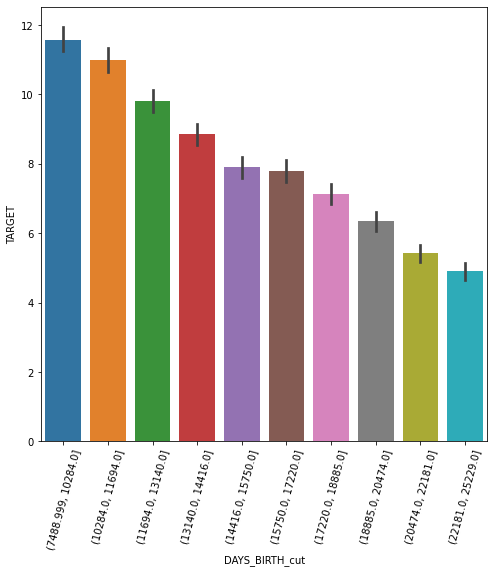

In [62]:
# 畫出長條圖
plt.figure(figsize=(8, 8))

#以出生日數為x, target為y繪製長條圖
px = app_train['DAYS_BIRTH_qcut']
py = 100*app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

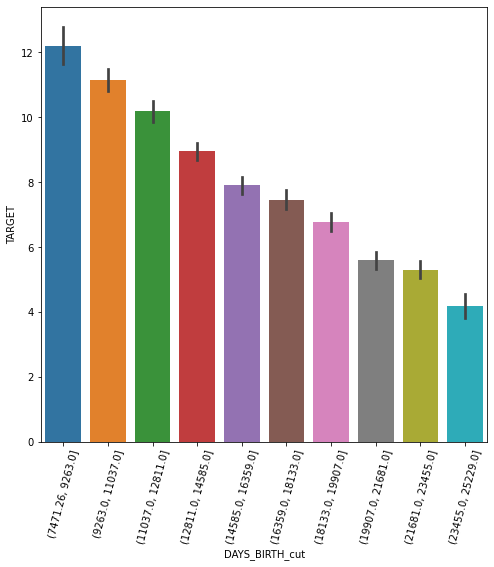

In [64]:
# 畫出長條圖
plt.figure(figsize=(8, 8))

#以出生日數為x, target為y繪製長條圖
px = app_train['DAYS_BIRTH_cut']
py = 100*app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75)